Each XLS or XLSX file contains a dataframe. 

Load each XLS or XLSX file in your Jupyter notebook. 

For each dataframe, address missing values by taking the following steps:

Count the number of missing values in the dataframe; count the number of missing values per column
Plot the distribution of data points using a histogram
Create a lag plot (a lag plot shows t versus t+1)
Based on the lag plot, state in a markdown cell whether the order of this data matters. 
Do one of the following (not both):
If the order of the data matters, then interpolate the missing values
If the order of the data does not matter, fill in the missing data by sampling from the distribution
Create a scatter plot using the columns in dataframe; no Nan entries should be present
Submit a single Jupyter notebook with your analysis of the XLSX and XLS files.

Perform interpolation or sampling programmatically using Python (not manually)  

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas.plotting import lag_plot

Reading the hw1,hw2 and hw3 files

In [7]:
df1 = pandas.read_excel('hw1.xls',names=['sno','Time','value'],index_col=False, header=0)
df2 = pandas.read_excel('hw2.xlsx',names=['sno','X','Y'],index_col=False, header=0)
df3 = pandas.read_excel('hw3.xlsx',names=['sno','Date','value'],index_col=False, header=0)

In [8]:
df1.drop('sno', axis=1, inplace=True)
df2.drop('sno', axis=1, inplace=True)
df3.drop('sno', axis=1, inplace=True)

In [9]:
df1.head()

,Time,value
0,0.00,0.000000
1,0.02,2.528779
2,0.04,2.419020
3,0.06,0.665052
4,0.08,0.506655


In [10]:
df2.head()

,X,Y
0,1.40,10.00
1,1.45,10.25
2,1.50,10.50
3,1.55,10.75
4,1.60,11.00


In [11]:
df3.head()

,Date,value
0,2015-11-03,30.001248
1,2015-11-04,4.655104
2,2015-11-05,15.621201
3,2015-11-06,22.982759
4,2015-11-07,39.994644


In [12]:
#missing values percolumn
df1.isnull().sum()

Time      0
value    50
dtype: int64

In [13]:
#missing values percolumn
df2.isnull().sum()

X    9
Y    0
dtype: int64

In [14]:
#missing values percolumn
df3.isnull().sum()

Date      0
value    84
dtype: int64

histogram of df1

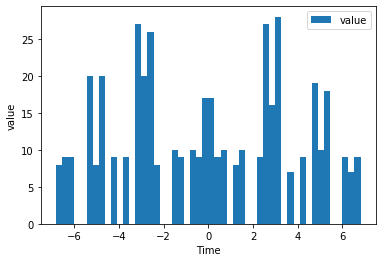

In [15]:
%matplotlib inline
df1.plot(kind='hist',x='Time',y='value', alpha=1,bins=50)
plt.xlabel('Time')
plt.ylabel('value')
plt.legend()
plt.show()

histogram of df2

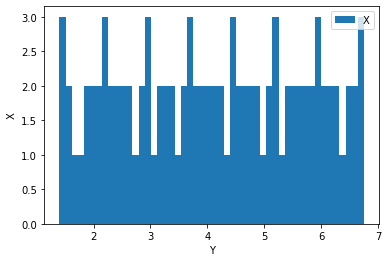

In [16]:
df2.plot(kind='hist',x='Y',y='X', alpha=1,bins=50)
plt.xlabel('Y')
plt.ylabel('X')
plt.legend()
plt.show()

histogram of df3

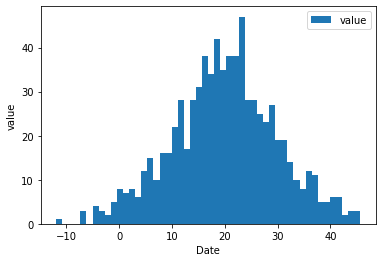

In [19]:
df3['Date'] = pd.to_datetime(df3['Date'])
df3.index = df3['Date']
df3.plot(kind='hist',x='Date',y='value',bins=50)
plt.xlabel('Date')
plt.ylabel('value')
plt.show()

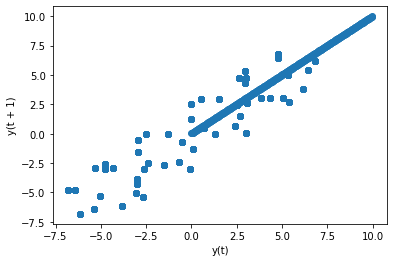

In [20]:
lag_plot(df1)

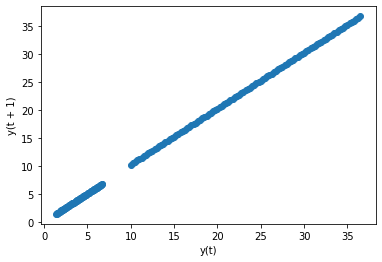

In [21]:
lag_plot(df2)

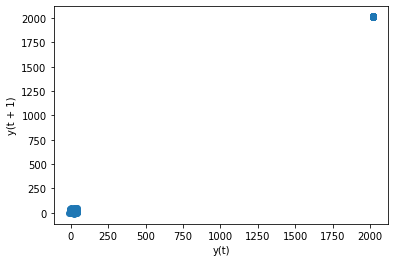

In [22]:
df3['Date'] = df3.Date.dt.year + df3.Date.dt.month / 12. + df3.Date.dt.day / 30
lag_plot(df3)

In [23]:
ndf1=df1.interpolate()
ndf1.isnull().sum()

Time     0
value    0
dtype: int64

In [24]:
ndf2=df2.interpolate()
ndf2.isnull().sum()

X    0
Y    0
dtype: int64

In [25]:
ndf3=df3.interpolate(method ='time')
ndf3.isnull().sum()

Date     0
value    0
dtype: int64

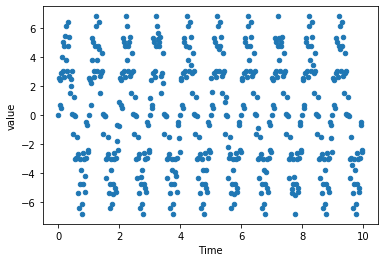

In [26]:
ndf1.plot.scatter('Time','value')

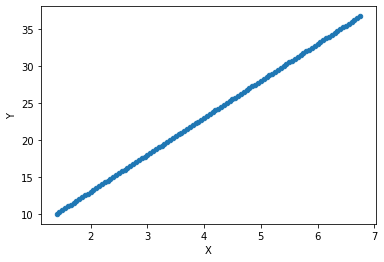

In [27]:
ndf2.plot.scatter('X','Y')

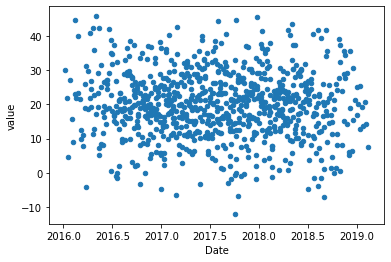

In [28]:
ndf3.plot.scatter('Date','value')